In [69]:
import ssl
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
import random
import statistics 
import math
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()




### Section 1 - Variance estimation

In [70]:
url = 'https://raw.githubusercontent.com/galsalo/statistics_labs/main/votes%20per%20ballot%202021%20-%20votes%20per%20ballot%202021.csv'
df = pd.read_csv(url)
df.loc["total"] = df.sum()

votes_per_party = {}

j = 11
for i in pd.array(df.columns[11:]): #Counting votes per party
  votes_per_party[i] = df.iloc[-1, j]
  j += 1


total_votes1 = [[i] * votes_per_party[i] for i in votes_per_party]
total_votes1 = [item for sublist in total_votes1 for item in sublist] #Creating a list with all votes 


real_freq_votes = {}
for i in votes_per_party:
  real_freq_votes[i] = votes_per_party[i]/len(total_votes1) #Calculating frequencies per party


results = [] #an array of 100 random samples, for m=2000
for i in range(0, 100):
  temp = random.sample(total_votes1, 2000) 
  results.append(temp) 

new = {k: v for k, v in sorted(votes_per_party.items(), key=lambda item: item[1])}
small_parties = list(new.keys())[0:26] #A list of unrelevent parties

freq = {key: [] for key in df.columns[11:]} #Containts the reletive frequency for 13 biggest parties


for party in small_parties:
  freq.pop(party, None)

for result in results:
  for item in freq:
    freq[item].append(result.count(item)/2000) #Calculating frequncies

freq = dict(sorted(freq.items(), key=lambda item: item[1]))

var_dict = {} #dictionary for variance estimators. Contains a list of 100 results per party
bias_dict = {} #dictionary for bias estimators. Contains a list of 100 results per party
mse_dict = {} #dictionary for mse estimators. Contains a list of 100 results per party

for i in freq: #using formulas to calculate 
  temp_mean = statistics.mean(freq[i])
  bias_dict[i] = temp_mean - real_freq_votes[i]
  var_dict[i] = statistics.variance(freq[i]) 
  mse_dict[i] = (var_dict[i] + (bias_dict[i]**2))

res_df = pd.DataFrame([var_dict,bias_dict,mse_dict], index = ["var", "bias", "mse"]) #Data frame of the 3 dictionaries



theo_var = {} #Variacne calculated theoraticlly per party from the given formula
for i in var_dict:
  theo_var[i] = real_freq_votes[i] * (1-real_freq_votes[i]) / 2000

df1 = pd.DataFrame([var_dict,theo_var], index = ["var", "theo_var"])

res_df.transpose()


var      bias       mse
עם    0.000017  0.000302  0.000017
ודעם  0.000018  0.000101  0.000018
ת     0.000021  0.000747  0.000022
מרצ   0.000025  0.000476  0.000025
ג     0.000033 -0.000044  0.000033
ט     0.000026 -0.000165  0.000026
ב     0.000036  0.000016  0.000036
אמת   0.000034  0.000586  0.000034
ל     0.000028  0.000561  0.000028
שס    0.000037 -0.000991  0.000038
כן    0.000032  0.000789  0.000033
פה    0.000061 -0.001533  0.000063
מחל   0.000078 -0.000543  0.000079

In [71]:
fig = px.scatter(df1.transpose(),labels ={'index' : 'parties'} , title = "Variance Scatter Plot")
fig.show()


Text(0.5, 1.0, 'Variance scatter plot')

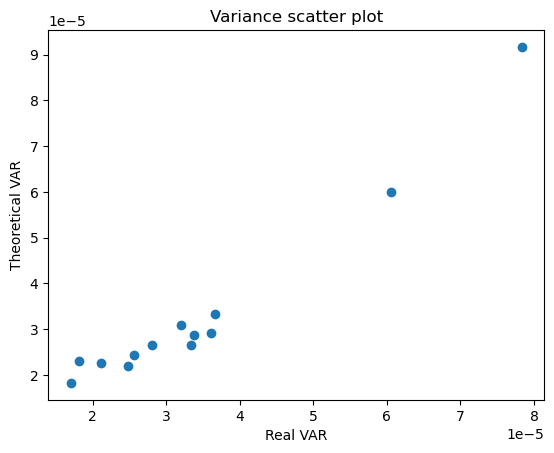

In [72]:
plt.scatter(list(df1.iloc[0]), list(df1.iloc[1]))
plt.xlabel('Real VAR')
plt.ylabel('Theoretical VAR')
plt.title('Variance scatter plot')


### Section 2

In [73]:
big_parties = list(freq.keys()) #List of relevent parties

res_dict = [] #For each party, a dictionary for the sample results (100 values per party)
for i in range(0, 100):
  temp_dict = {}
  temp = random.sample(list(df['ברזל']), 6)
  temp = df.loc[df['ברזל'].isin(temp)]
  ksherim = list(temp['כשרים'])
  for party in big_parties:
    temp_dict[party] = statistics.mean(np.divide(list(temp[party]), list(temp['כשרים'])))
  res_dict.append(temp_dict)

var_dict1 = {} #Creating dictionaries for new sampling by parties (100 values per party)
bias_dict1 = {}
mse_dict1 = {}
party_dict = {key: [] for key in big_parties} #sample results per party dictionary
p_j = {key: [] for key in big_parties}


for party in big_parties:
  for midgam in res_dict:
    party_dict[party].append(midgam[party])

for i in party_dict:
  temp_mean = statistics.mean(party_dict[i])
  p_j[i] = temp_mean
  bias_dict1[i] = temp_mean - real_freq_votes[i]
  var_dict1[i] = statistics.variance(party_dict[i]) 
  mse_dict1[i] = (var_dict1[i] + (bias_dict1[i]**2))

res_df1 = pd.DataFrame([var_dict1,bias_dict1,mse_dict1], index = ["var", "bias", "mse"])

res_df1.transpose()


var      bias       mse
עם    0.003547  0.010238  0.003652
ודעם  0.004517  0.017760  0.004833
ת     0.000128 -0.001841  0.000131
מרצ   0.000533  0.001555  0.000536
ג     0.003739 -0.007825  0.003800
ט     0.001268 -0.001996  0.001272
ב     0.000641  0.000412  0.000641
אמת   0.000744 -0.000257  0.000744
ל     0.000870  0.002817  0.000878
שס    0.001092 -0.009267  0.001178
כן    0.000538 -0.000960  0.000539
פה    0.001610 -0.004661  0.001632
מחל   0.003714 -0.006869  0.003762

In [83]:
print(f'Looking at the bias, we can see it is quite close to 0, with a max difference of: {max(abs(res_df1.iloc[0:, 1]))} ')




Looking at the bias, we can see it is quite close to 0, with a max difference of: 0.01776043380425725 


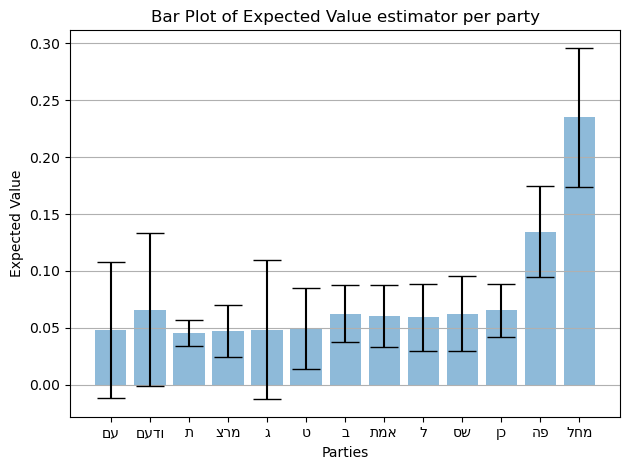

In [75]:
standard_deviation = res_df1.iloc[0,0:] ** 0.5

big_parties = [party[::-1] for party in big_parties]

fig, ax = plt.subplots()
ax.bar(big_parties, list(p_j.values()), yerr=standard_deviation, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Expected Value')
ax.set_xlabel('Parties')

ax.set_xticks(big_parties)
ax.set_title('Bar Plot of Expected Value estimator per party').set_fontsize(12)
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()


In [76]:
df2 = pd.DataFrame([var_dict1, var_dict], index = ["midgam kalpiot", "midgam voters"])


px.scatter(df2.transpose(),labels ={'index' : 'parties'}, title = "Variance Scatter Plot")

Looking at the scatter plot of the midgamim, we can cleary see that the variance in midgam kalpiot is higher than the variacne for midgam voters. This could be explained by the fact different kalpiot could be biased towards a particular party. Midgam voters is much more random, and thus the variance is smaller.

Lookin at the results, we can see that most parties around 6-7 mandates have relatively closer variances to the votes midgamim ('אמת', 'ת' ,כן' and so on). I should note that other than big parties, high variances occur mainly for Hardi and Arab parties, this makes sense because they are sectorial parties, and thus are less likely to be sampled in a random kalpi.


### Section 3

In [77]:
parties = [party[::-1] for party in big_parties]
q_dict = {key: [] for key in parties} # Dictionary with frequncies of given data for each party
values = sorted([0.048, 0.072, 0.054, 0.063, 0.033, 0.034, 0.055, 0.257, 0.033, 0.033, 0.144, 0.062, 0.071]) # frequencies from given data
j=0
for i in q_dict:
  q_dict[i] = values[j]
  j+=1

alpha = np.arange(0.01, 1.01, 0.01)
n = 100

var_dict2 = {key: [] for key in parties} #Creating dictionaries for new data by parties (100 values per party)
mse_dict2 = {key: [] for key in parties}
bias_dict2 = {key: [] for key in parties}

for i in parties:
  k =0
  for j in alpha:
    var_dict2[i].append(j**2 * p_j[i] * (1-p_j[i]) / n)  #Caluclating by formulas given in class
    bias_dict2[i].append((1-j)**2 * (q_dict[i]-p_j[i])**2)
    mse_dict2[i].append((var_dict2[i][k] + bias_dict2[i][k]))
    k += 1


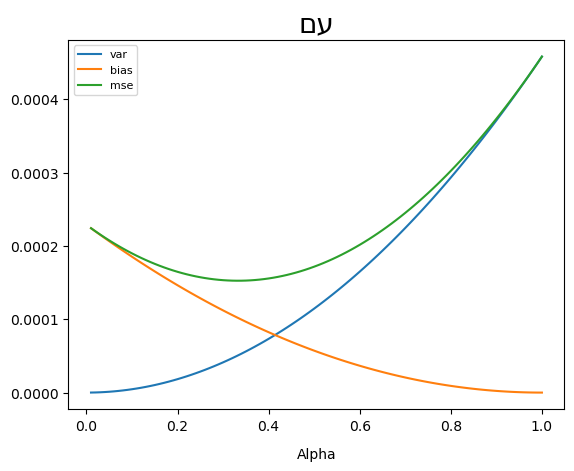

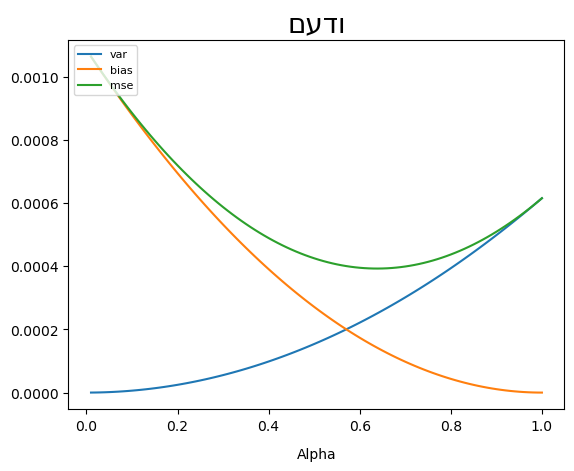

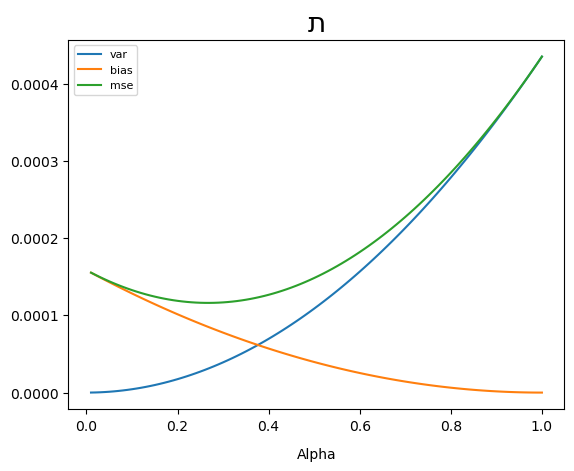

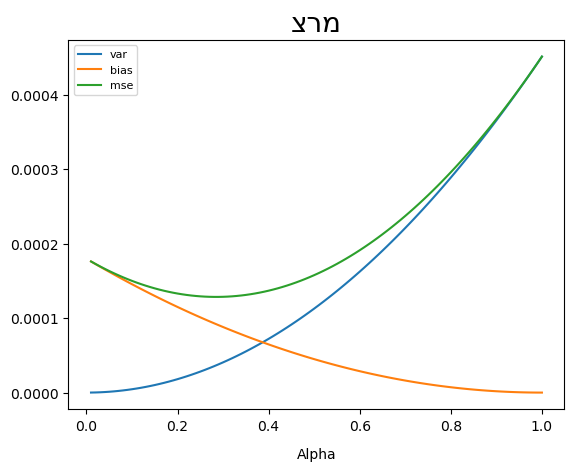

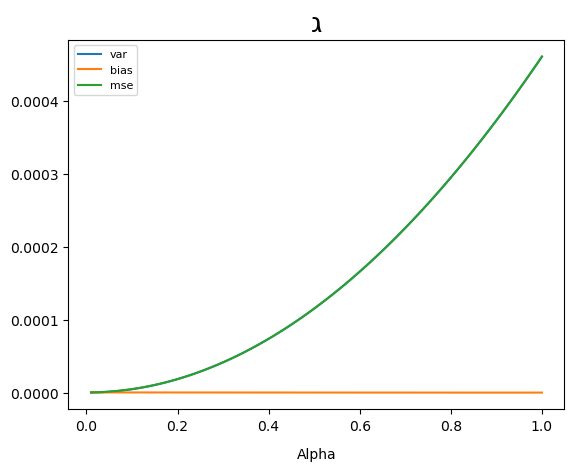

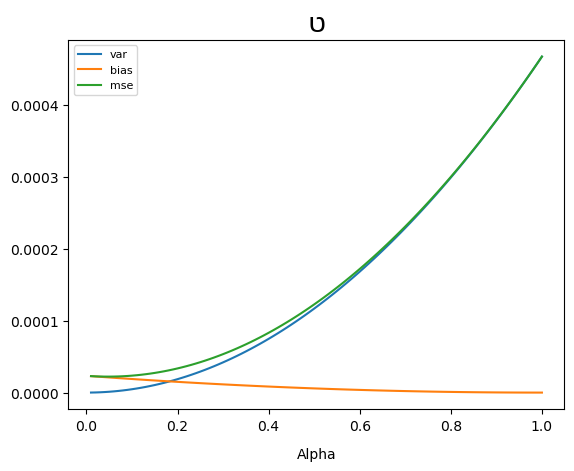

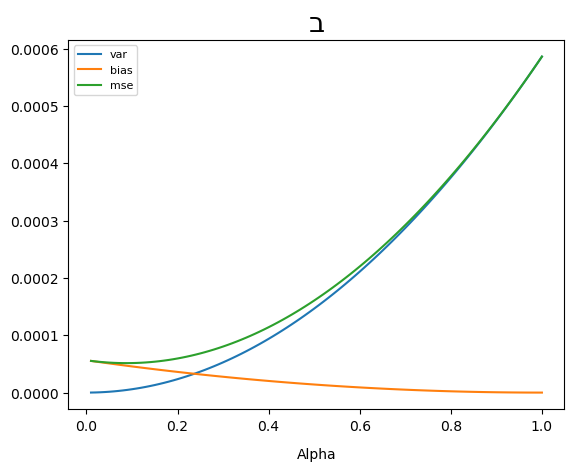

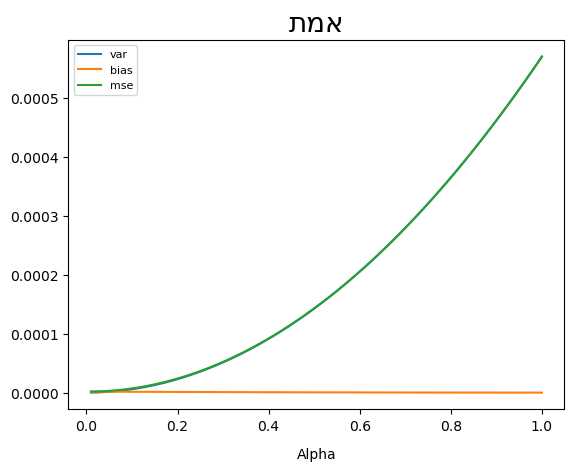

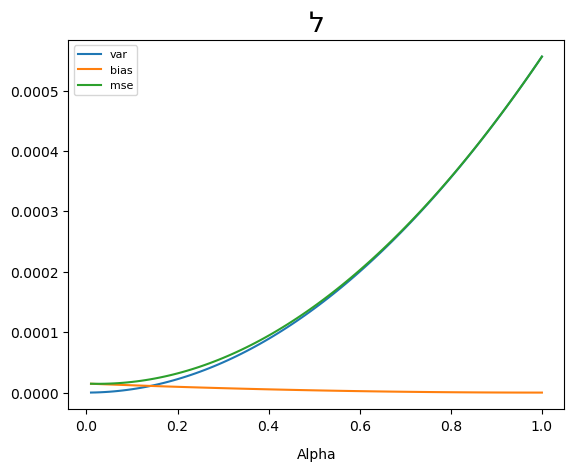

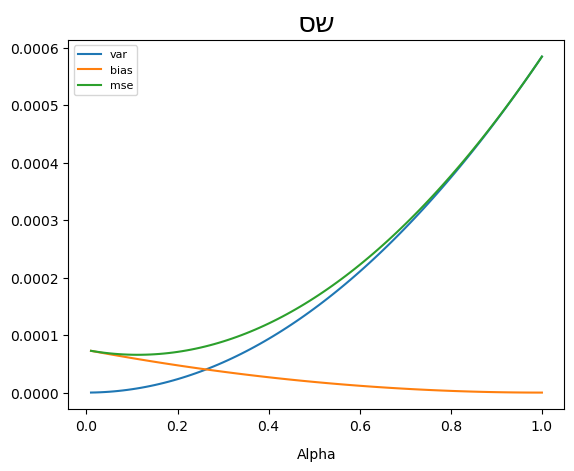

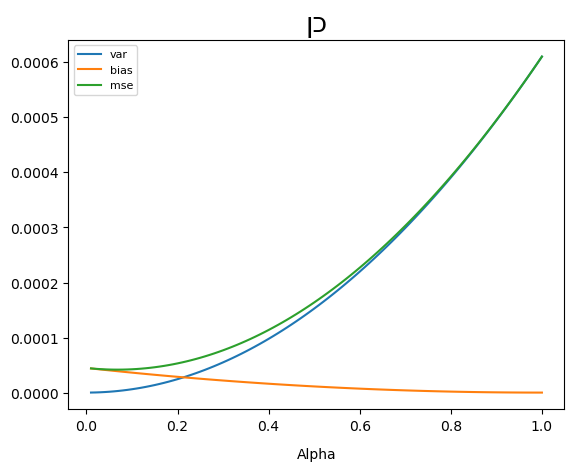

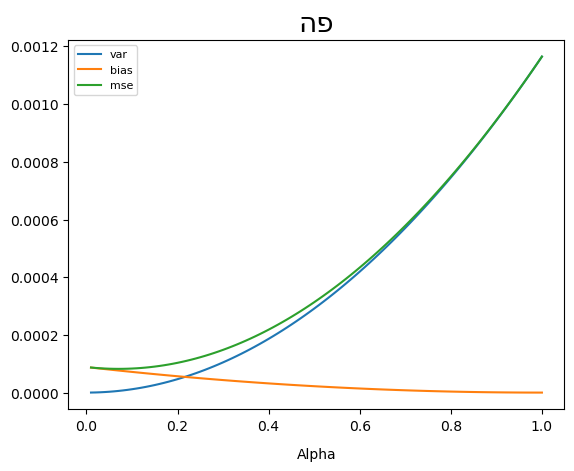

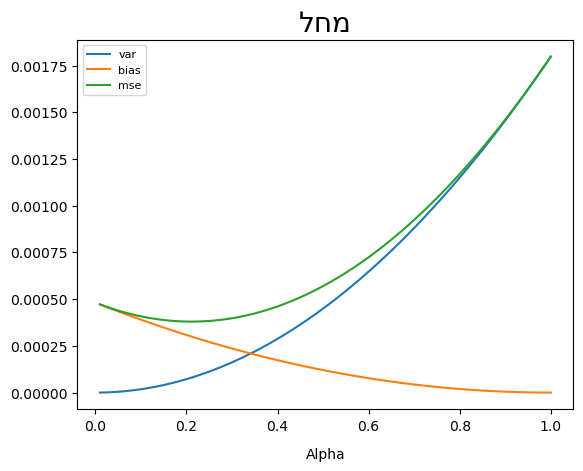

In [78]:

for i in parties:
  j = i[::-1]
  plt.plot(alpha, var_dict2[i])
  plt.plot(alpha, bias_dict2[i])
  plt.plot(alpha, mse_dict2[i])
  plt.legend(['var', 'bias', 'mse'],loc= 'upper left', fontsize = 8)
  plt.title(f"{j}", fontsize=20)
  plt.xlabel("Alpha",labelpad =10, fontsize=10)
  plt.show()
  

### Section 4

I used the standard formula MSE and derived the following formula to get the alpha which minimizes MSE:

$$ \alpha_{min} = \frac{n * q_i ^2 - 2np_{ji} *q_i + n*p_{ji} ^2} {(p_{ji} -p_{ji}^2) + n * q_i ^2 - 2np_{ji} *q_i + n*p_{ji} ^2}  $$



In [79]:
mse_min = {key: [] for key in parties} 

for i in mse_min:
  alpha_min = (n * (q_dict[i] **2) - (2*n*p_j[i]*q_dict[i]) + n*(p_j[i]**2)) / (p_j[i] - (p_j[i] **2) 
  + (n * (q_dict[i]**2) - 2*n*p_j[i]*q_dict[i]) + (n *(p_j[i]**2)))
  mse_min [i] = (((alpha_min ** 2) * p_j[i] * (1-p_j[i])) / n) + ((1-alpha_min)**2) * ((q_dict[i] - p_j[i])**2)


I added the minimum alpha calculated to the graph, and to verify my calculations I added the minimum MSE line too

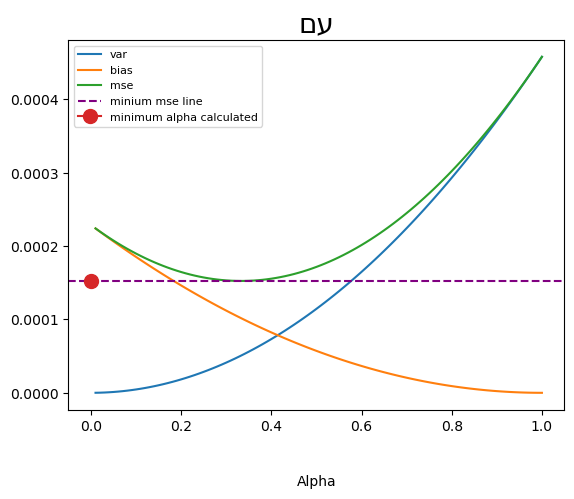

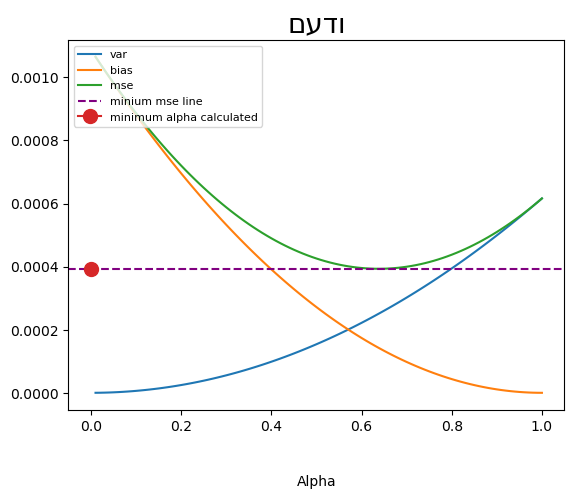

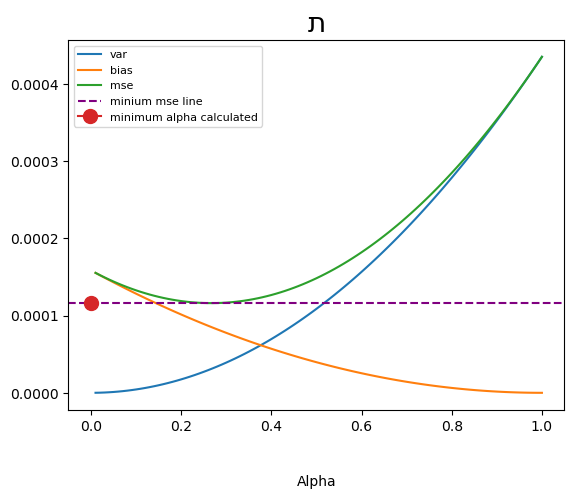

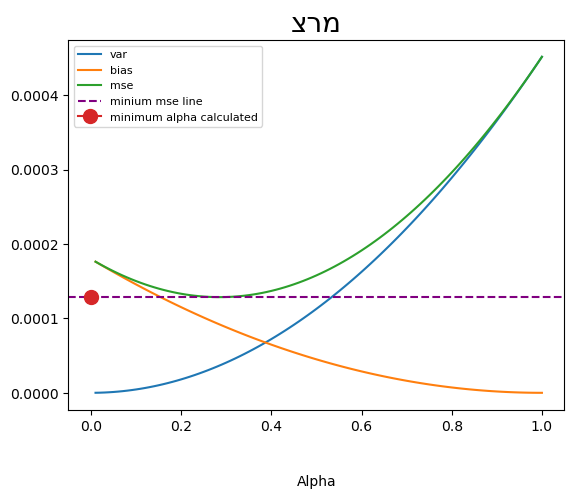

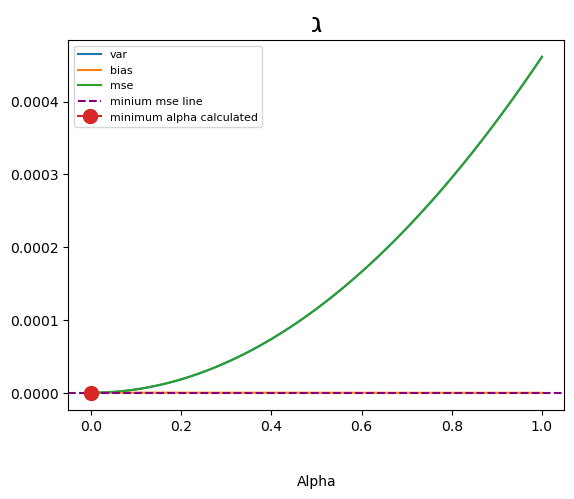

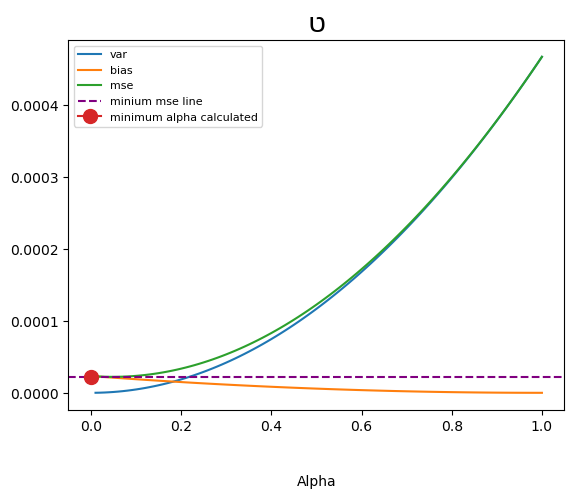

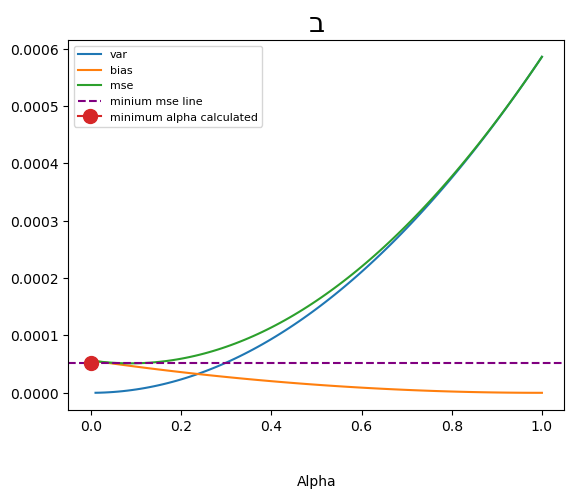

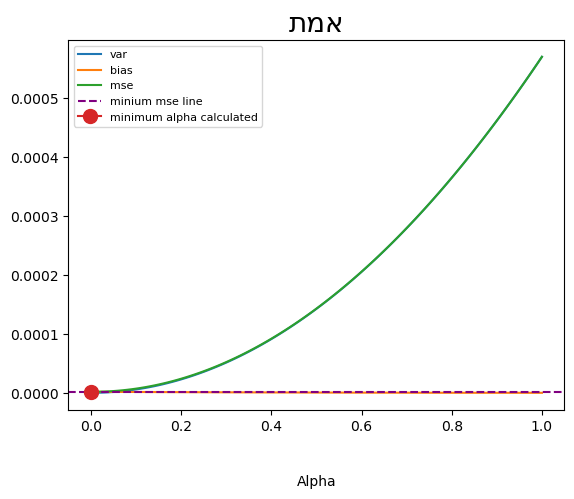

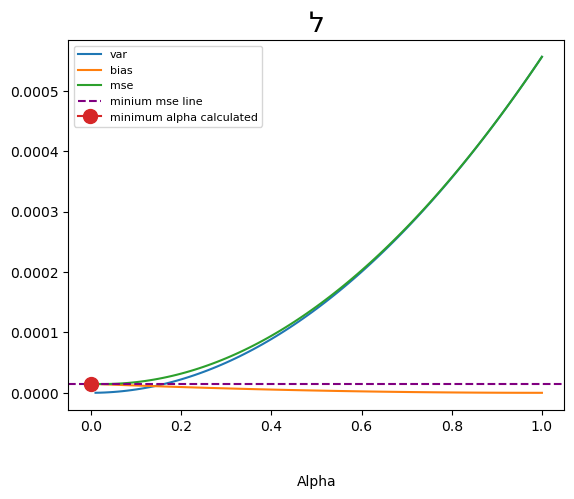

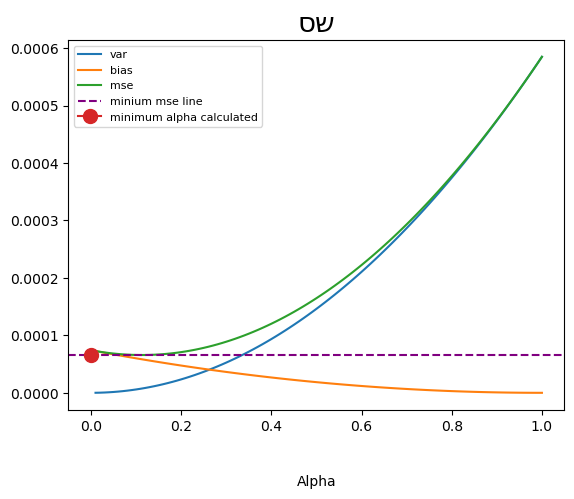

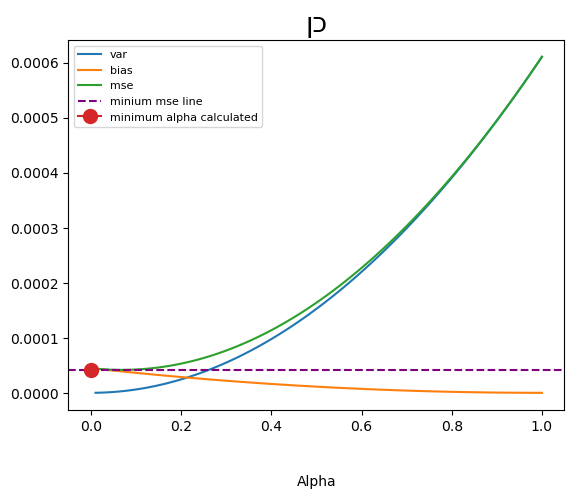

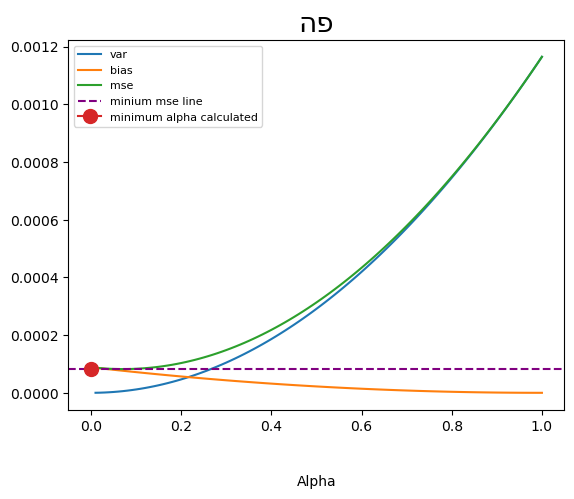

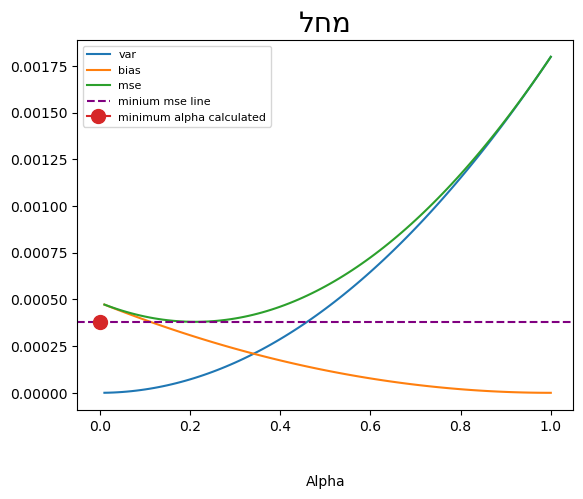

In [80]:

for i in parties:
  j = i[::-1]
  plt.plot(alpha, var_dict2[i])
  plt.plot(alpha, bias_dict2[i])
  plt.plot(alpha, mse_dict2[i])
  plt.axhline(y=np.min(mse_dict2[i]), color='purple', linestyle='--')
  plt.plot(mse_min[i], marker = "o", markersize = 10)
  plt.legend(['var', 'bias', 'mse', 'minium mse line', 'minimum alpha calculated'],loc= 'upper left', fontsize = 8)
  plt.title(f"{j}", fontsize=20)
  plt.xlabel("Alpha",labelpad =30, fontsize=10)
  plt.show()
  

### Section 5

In [81]:
for i in parties:
  alpha_half_temp = (((0.5 ** 2) * p_j[i] * (1-p_j[i])) / n) + ((1-0.5)**2) * ((q_dict[i] - p_j[i])**2)
  alpha_1_temp = (((1 ** 2) * p_j[i] * (1-p_j[i])) / n) + ((1-1)**2) * ((q_dict[i] - p_j[i])**2)
  print(f'\nmse for party: {i} and alpha=0.5 = {alpha_half_temp}')
  print(f'mse for party: {i} and alpha=1 = {alpha_1_temp}')
  print(f'\nis it better than alpha = 1? {alpha_half_temp < alpha_1_temp}')
      


mse for party: עם and alpha=0.5 = 0.00017166544454782365
mse for party: עם and alpha=1 = 0.0004580452823628934

is it better than alpha = 1? True

mse for party: ודעם and alpha=0.5 = 0.00042569990164784095
mse for party: ודעם and alpha=1 = 0.0006161329525810693

is it better than alpha = 1? True

mse for party: ת and alpha=0.5 = 0.0001483808964237624
mse for party: ת and alpha=1 = 0.00043508898704662735

is it better than alpha = 1? True

mse for party: מרצ and alpha=0.5 = 0.00015785184029976313
mse for party: מרצ and alpha=1 = 0.0004516119021151923

is it better than alpha = 1? True

mse for party: ג and alpha=0.5 = 0.00011543012241513022
mse for party: ג and alpha=1 = 0.00046147118815730167

is it better than alpha = 1? True

mse for party: ט and alpha=0.5 = 0.00012271307416008987
mse for party: ט and alpha=1 = 0.00046751911076815415

is it better than alpha = 1? True

mse for party: ב and alpha=0.5 = 0.00016058019721045414
mse for party: ב and alpha=1 = 0.0005859865946180788

is it

In [82]:
for i in alpha:
    count = 0
    for party in parties:
        alpha_half = (((0.5 ** 2) * p_j[party] * (1-p_j[party])) / n) + ((1-0.5)**2) * ((q_dict[party] - p_j[party])**2)
        alpha_temp = (((i ** 2) * p_j[party] * (1-p_j[party])) / n) + ((1-i)**2) * ((q_dict[party] - p_j[party])**2)
        if alpha_temp <= alpha_half:
            count += 1
    if count == len(parties):
        print(i)
            

0.5


From the calculations above, we can see that using alpha = 0.5 improves the MSE values for all parties rather than using the midgam results (alpha = 1). 

Looking at the graphs and calculations above, we can also see that getting a better MSE result for all parties with a constant alpha value for all is not possible (MSE gets a maximal minimum for all parties at constant alpha = 0.5). 